In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

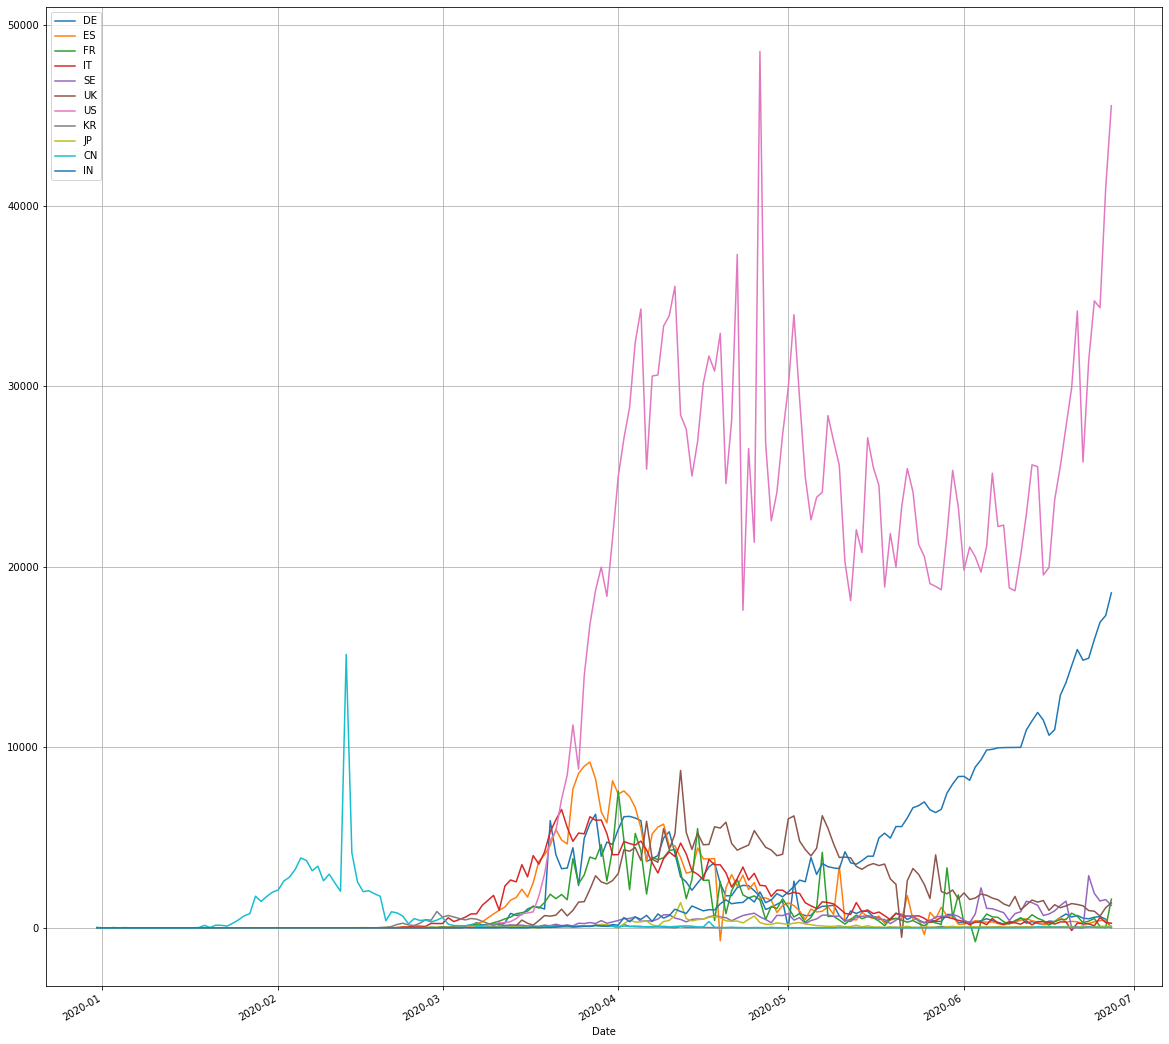

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

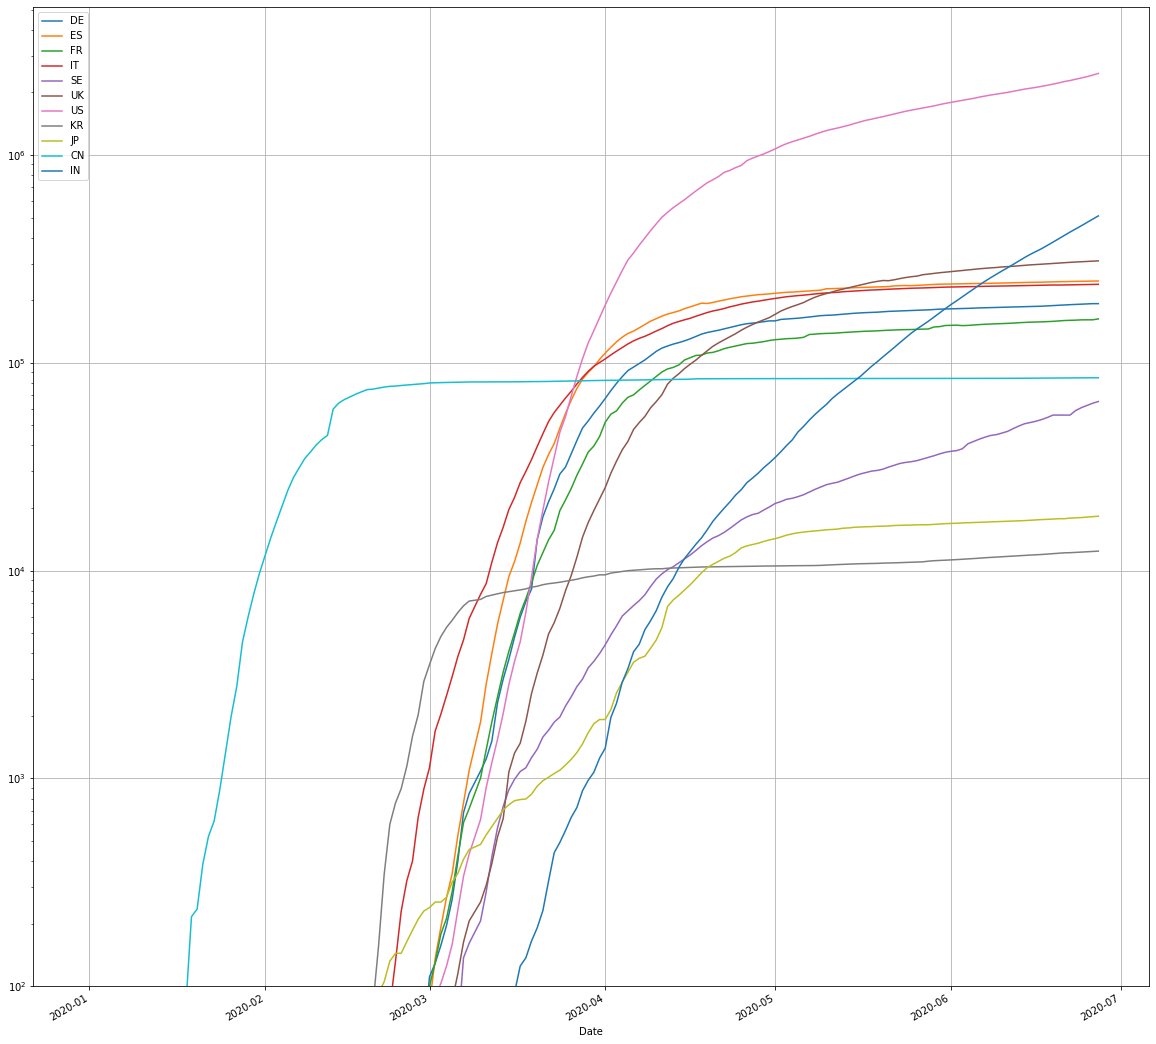

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

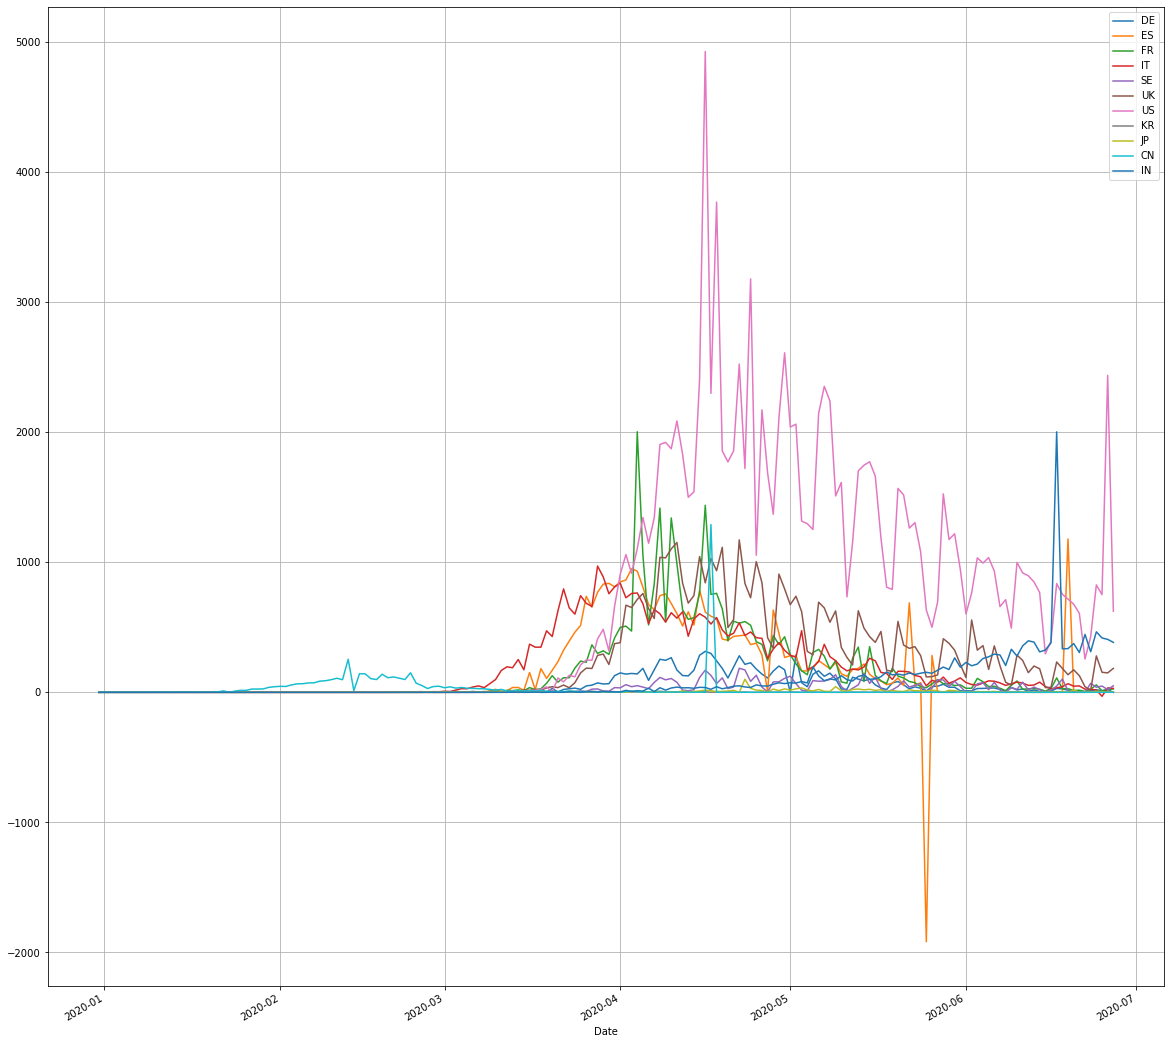

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

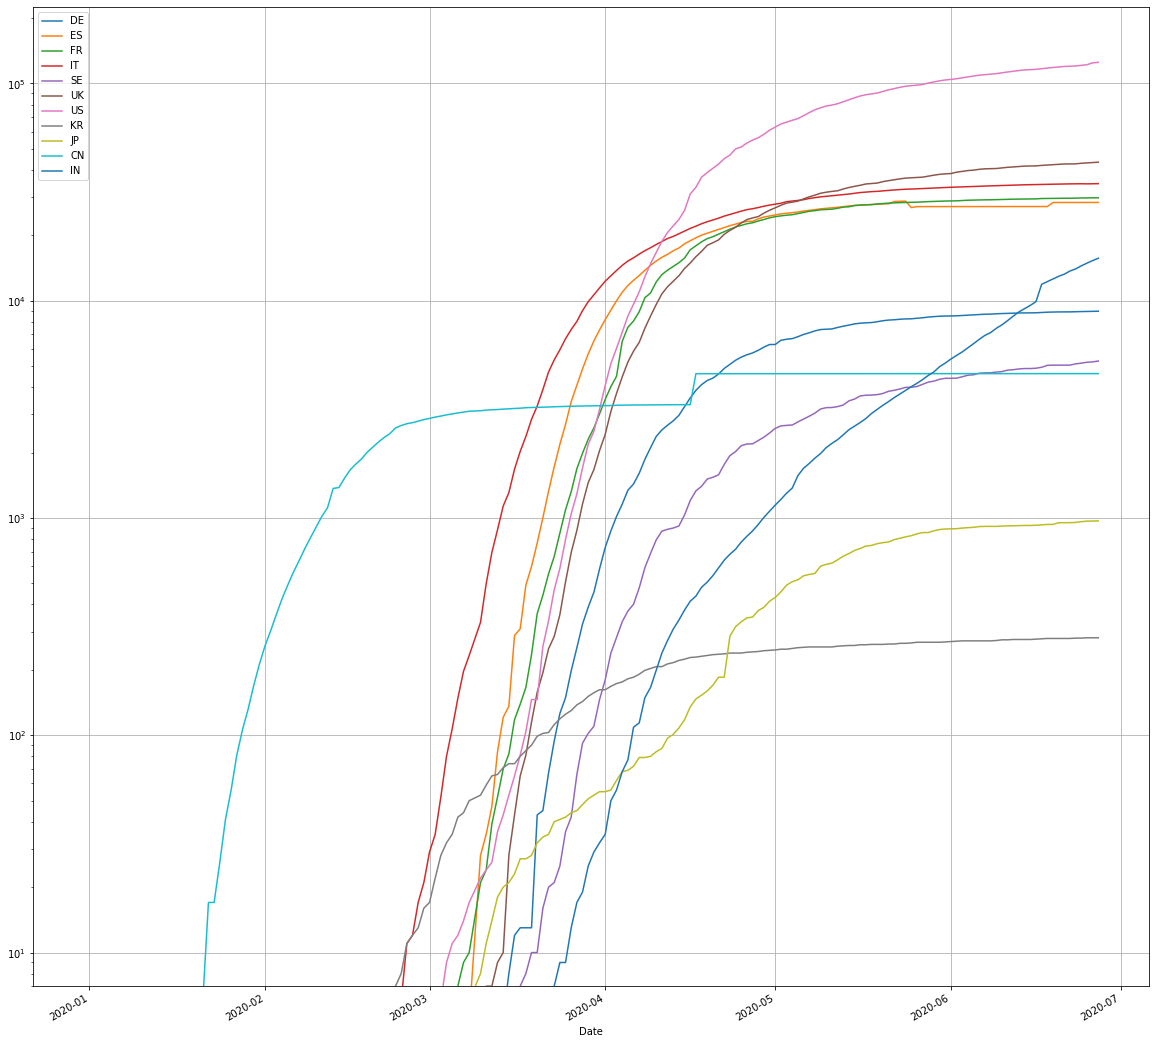

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-06-13,348.0,396.0,726,163,1396,1541,25639,48,50,12,11458
12,2020-06-14,247.0,323.0,526,346,1247,1425,25540,33,47,60,11929
11,2020-06-15,192.0,181.0,407,338,683,1514,19543,37,73,47,11502
10,2020-06-16,378.0,219.0,152,301,769,968,19957,34,85,43,10667
9,2020-06-17,345.0,355.0,344,210,940,1279,23705,43,41,44,10974
8,2020-06-18,580.0,585.0,458,328,1239,1115,25559,59,40,36,12881
7,2020-06-19,770.0,307.0,467,331,1481,1218,27762,49,72,36,13586
6,2020-06-20,601.0,363.0,811,-148,0,1346,29909,67,59,30,14516
5,2020-06-21,687.0,334.0,641,264,0,1295,34158,48,0,29,15413
4,2020-06-22,537.0,232.0,284,224,0,1221,25793,17,117,19,14821


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-06-13,185967.0,243172.0,155877.0,234813.0,49642.0,292883.0,2048865.0,11803.0,17349.0,84183.0,308993.0
2020-06-14,186214.0,243495.0,156403.0,235159.0,50889.0,294308.0,2074405.0,11836.0,17396.0,84243.0,320922.0
2020-06-15,186406.0,243676.0,156810.0,235497.0,51572.0,295822.0,2093948.0,11873.0,17469.0,84290.0,332424.0
2020-06-16,186784.0,243895.0,156962.0,235798.0,52341.0,296790.0,2113905.0,11907.0,17554.0,84333.0,343091.0
2020-06-17,187129.0,244250.0,157306.0,236008.0,53281.0,298069.0,2137610.0,11950.0,17595.0,84377.0,354065.0
2020-06-18,187709.0,244835.0,157764.0,236336.0,54520.0,299184.0,2163169.0,12009.0,17635.0,84413.0,366946.0
2020-06-19,188479.0,245142.0,158231.0,236667.0,56001.0,300402.0,2190931.0,12058.0,17707.0,84449.0,380532.0
2020-06-20,189080.0,245505.0,159042.0,236519.0,56001.0,301748.0,2220840.0,12125.0,17766.0,84479.0,395048.0
2020-06-21,189767.0,245839.0,159683.0,236783.0,56001.0,303043.0,2254998.0,12173.0,17766.0,84508.0,410461.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-06-13,18.0,0.0,28,56,40,202,849,0,2,0,386
12,2020-06-14,6.0,0.0,24,78,20,181,767,0,1,0,311
11,2020-06-15,4.0,0.0,9,44,0,36,296,0,0,0,325
10,2020-06-16,9.0,0.0,29,26,17,38,395,1,2,0,380
9,2020-06-17,30.0,0.0,111,34,48,233,836,1,4,0,2003
8,2020-06-18,26.0,0.0,28,43,102,184,754,1,4,0,334
7,2020-06-19,16.0,1179.0,28,66,12,135,717,0,0,0,336
6,2020-06-20,10.0,7.0,14,47,0,173,678,0,17,0,375
5,2020-06-21,0.0,1.0,16,49,0,128,607,0,0,1,306
4,2020-06-22,3.0,1.0,7,24,0,43,256,0,1,0,445


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-06-13,8781.0,27136.0,29365.0,34090.0,4854.0,41481.0,114665.0,276.0,923.0,4615.0,8884.0
2020-06-14,8787.0,27136.0,29389.0,34168.0,4874.0,41662.0,115432.0,276.0,924.0,4615.0,9195.0
2020-06-15,8791.0,27136.0,29398.0,34212.0,4874.0,41698.0,115728.0,276.0,924.0,4615.0,9520.0
2020-06-16,8800.0,27136.0,29427.0,34238.0,4891.0,41736.0,116123.0,277.0,926.0,4615.0,9900.0
2020-06-17,8830.0,27136.0,29538.0,34272.0,4939.0,41969.0,116959.0,278.0,930.0,4615.0,11903.0
2020-06-18,8856.0,27136.0,29566.0,34315.0,5041.0,42153.0,117713.0,279.0,934.0,4615.0,12237.0
2020-06-19,8872.0,28315.0,29594.0,34381.0,5053.0,42288.0,118430.0,279.0,934.0,4615.0,12573.0
2020-06-20,8882.0,28322.0,29608.0,34428.0,5053.0,42461.0,119108.0,279.0,951.0,4615.0,12948.0
2020-06-21,8882.0,28323.0,29624.0,34477.0,5053.0,42589.0,119715.0,279.0,951.0,4616.0,13254.0
